In [32]:

import pandas as pd
import os


In [3]:
tiktokdata = os.path.expanduser("~/Downloads/Tiktok_data_united-kingdom.csv")

In [33]:
df = pd.read_csv(tiktokdata)
tiktokdata

'/Users/vee/Downloads/Tiktok_data_united-kingdom.csv'

In [34]:
print(df.head()) #exploring the data

                                                   #;NAME;FOLLOWERS;ER;COUNTRY;TOPIC OF INFLUENCE;POTENTIAL REACH
1;Gordon Ramsay @gordonramsayofficial;40M;1                               10%;United Kingdom;Food;12M            
2;mks @mks.vision;20.6M;-;United Kingdom;;6.2M                                                    NaN            
3;Spice King @spicyycam_;19.1M;-;United Kingdom...                                                NaN            
4;Ed Sheeran @edsheeran;15.2M;0                       90%;United Kingdom;Entertainment and Music;4.6M            
5;Queen Star 🧚🏼‍♀️ @queenstaralien;11.6M;0          30%;United Kingdom;Fashion and Accessories Ent...            


In [35]:
df.info() #exploring the data

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1;Gordon Ramsay @gordonramsayofficial;40M;1 to 100;Yorkshire Peach @yorkshirepeach;1.1M;-;United Kingdom;Entertainment and Music;330K
Data columns (total 1 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   #;NAME;FOLLOWERS;ER;COUNTRY;TOPIC OF INFLUENCE;POTENTIAL REACH  28 non-null     object
dtypes: object(1)
memory usage: 1.6+ KB


In [36]:
df = pd.read_csv("~/Downloads/Tiktok_data_united-kingdom.csv", delimiter=';') # i noticed that the delimiter is a semi colon in the csv file

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   100 non-null    int64 
 1   NAME                100 non-null    object
 2   FOLLOWERS           100 non-null    object
 3   ER                  100 non-null    object
 4   COUNTRY             100 non-null    object
 5   TOPIC OF INFLUENCE  77 non-null     object
 6   POTENTIAL REACH     100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [38]:
df[['Account_Name', 'Account_Handle']] = df['NAME'].str.split('@', expand=True) #spliting the name column to accoount name and account handle

In [39]:
df.info() #viewing the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   100 non-null    int64 
 1   NAME                100 non-null    object
 2   FOLLOWERS           100 non-null    object
 3   ER                  100 non-null    object
 4   COUNTRY             100 non-null    object
 5   TOPIC OF INFLUENCE  77 non-null     object
 6   POTENTIAL REACH     100 non-null    object
 7   Account_Name        100 non-null    object
 8   Account_Handle      100 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB


In [40]:
mask = df ['FOLLOWERS'].isnull() # creating a mask to find null values
mask

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: FOLLOWERS, Length: 100, dtype: bool

In [12]:
mask = df ['POTENTIAL REACH'].isnull() # creating a mask to find null values
mask

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: POTENTIAL REACH, Length: 100, dtype: bool

In [41]:
import re  # import the regular expression module to use regular expression to clean the data 

In [42]:
def convert_to_int(val):
    val = val.strip().lower()  
    match = re.match(r'^(\d+\.?\d*)([mk])?$', val)  # Use regex to extract numeric value and multiplier
    if match:
        numeric_value, multiplier = match.groups()
        numeric_value = float(numeric_value)
        if multiplier == 'k':
            return int(numeric_value * 1000)  # Multiply by 1000 for 'K'
        elif multiplier == 'm':
            return int(numeric_value * 1000000)  # Multiply by 1000000 for 'M'
        else:
            return int(numeric_value)  # No multiplier, return as integer
    else:
        return None
   
   
df['POTENTIAL REACH'] = df['POTENTIAL REACH'].apply(convert_to_int) #applying the function to the potential reach column


In [43]:
df.info() #exploring the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   100 non-null    int64 
 1   NAME                100 non-null    object
 2   FOLLOWERS           100 non-null    object
 3   ER                  100 non-null    object
 4   COUNTRY             100 non-null    object
 5   TOPIC OF INFLUENCE  77 non-null     object
 6   POTENTIAL REACH     100 non-null    int64 
 7   Account_Name        100 non-null    object
 8   Account_Handle      100 non-null    object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [44]:
# Function to convert string values with 'M' suffix to integers
def convert_to_int(val):
    val = val.strip().upper()  # Convert to uppercase and remove leading/trailing whitespace
    if 'M' in val:
        # Remove 'M' and multiply by 1,000,000 to convert to integer representing millions
        return int(float(val.replace('M', '')) * 1_000_000)
    else:
        return int(val)  # Convert directly if no 'M' suffix (this case won't actually be used here)

# applying the function to the followers column
df['FOLLOWERS'] = df['FOLLOWERS'].apply(convert_to_int)

In [45]:
df.info() #exploring the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   100 non-null    int64 
 1   NAME                100 non-null    object
 2   FOLLOWERS           100 non-null    int64 
 3   ER                  100 non-null    object
 4   COUNTRY             100 non-null    object
 5   TOPIC OF INFLUENCE  77 non-null     object
 6   POTENTIAL REACH     100 non-null    int64 
 7   Account_Name        100 non-null    object
 8   Account_Handle      100 non-null    object
dtypes: int64(3), object(6)
memory usage: 7.2+ KB


In [18]:
# Descriptive Statistics
print(df.describe())

                #     FOLLOWERS  POTENTIAL REACH
count  100.000000  1.000000e+02     1.000000e+02
mean    50.500000  3.312000e+06     9.951000e+05
std     29.011492  5.030739e+06     1.510074e+06
min      1.000000  1.100000e+06     3.300000e+05
25%     25.750000  1.400000e+06     4.200000e+05
50%     50.500000  1.700000e+06     5.100000e+05
75%     75.250000  2.825000e+06     8.475000e+05
max    100.000000  4.000000e+07     1.200000e+07


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



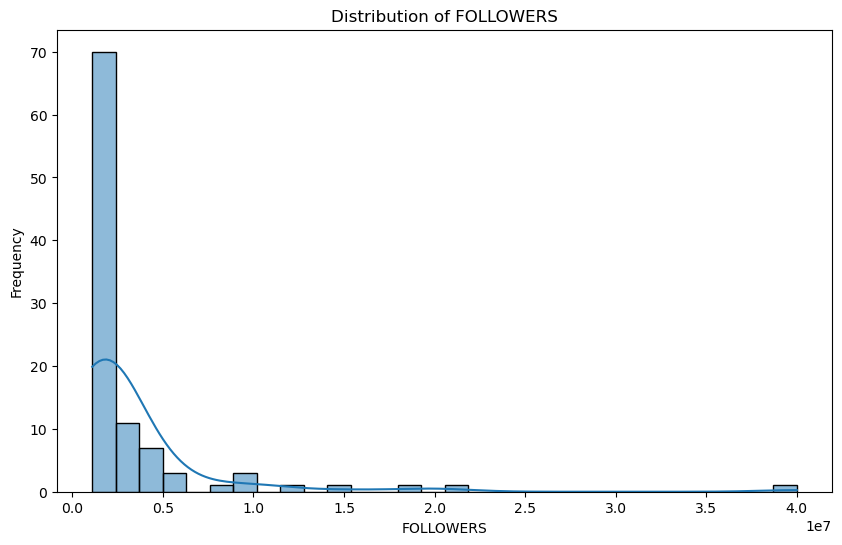

In [46]:

import matplotlib.pyplot as plt  # scatter plot to visualize the relationship between followers and potential reach
import seaborn as sns
import plotly.express as px # creating interactive plots to visualize the mean and median for followers and potential reach for each topic of influence

# Distribution Analysis of followers
plt.figure(figsize=(10, 6))
sns.histplot(df['FOLLOWERS'], bins=30, kde=True)
plt.title('Distribution of FOLLOWERS')
plt.xlabel('FOLLOWERS')
plt.ylabel('Frequency')
plt.show()

# Hist shows that there are around 70 infulencers who fall within a specific range of followers

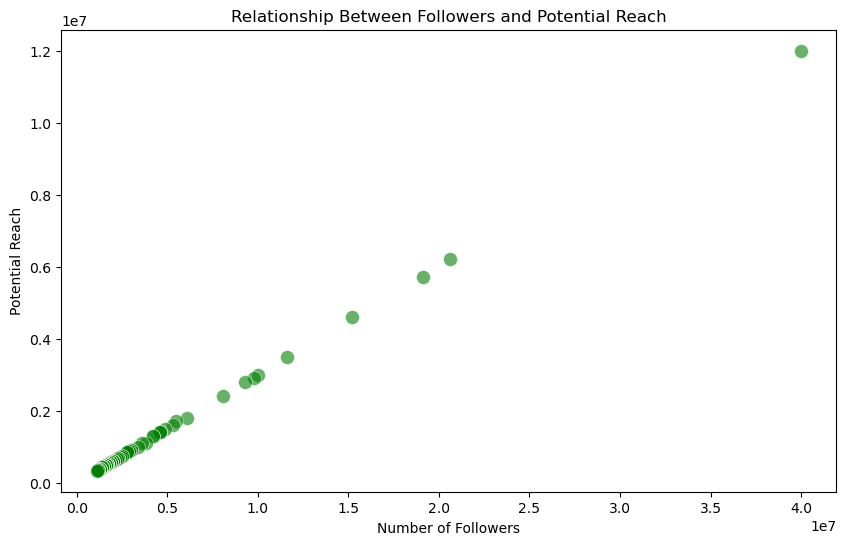

In [20]:
# Relationship between followers and potential reach
plt.figure(figsize=(10, 6))
# Create a scatter plot
sns.scatterplot(x='FOLLOWERS', y='POTENTIAL REACH', data=df, s=100, color='green', alpha=0.6, edgecolor='w', linewidth=0.5)
# Add titles and labels
plt.title('Relationship Between Followers and Potential Reach')
plt.xlabel('Number of Followers')
plt.ylabel('Potential Reach')

# Show the plot
plt.show()

# Each green marker on the plot represents an influencer, with their number of followers plotted on the x-axis and their potential reach plotted on the y-axis



In [47]:
#creating interactive plots to visualize the mean and median for followers and potential reach for each topic of influence
# Group and aggregate the data
topic_analysis = df.groupby('TOPIC OF INFLUENCE').agg({'FOLLOWERS': ['mean', 'median'], 'POTENTIAL REACH': ['mean', 'median']}).reset_index()
topic_analysis.columns = ['TOPIC OF INFLUENCE', 'FOLLOWERS Mean', 'FOLLOWERS Median', 'POTENTIAL REACH Mean', 'POTENTIAL REACH Median']

# bar plot for FOLLOWERS Mean and Median
fig_followers_bar = px.bar(topic_analysis, x='TOPIC OF INFLUENCE', y=['FOLLOWERS Mean', 'FOLLOWERS Median'], barmode='group',
                           title='Mean and Median FOLLOWERS by TOPIC OF INFLUENCE')
fig_followers_bar.show()

#  bar plot for POTENTIAL REACH Mean and Median
fig_reach_bar = px.bar(topic_analysis, x='TOPIC OF INFLUENCE', y=['POTENTIAL REACH Mean', 'POTENTIAL REACH Median'], barmode='group',
                       title='Mean and Median POTENTIAL REACH by TOPIC OF INFLUENCE')
fig_reach_bar.show()


# result shows that the values specifically for the 'FOOD' topic, the average and central figures for both followers and potential reach is in this category.
# with a mean score of 20.1 and potential reach score of 6.0 while the 
# median score for followers and potential reach is 19.1 and 5.7 respectively


In [26]:
# creating a histogram to visualize the distribution of follwers and distribution of potential reach by topic of influence

fig_followers_bar = px.histogram(df, x=df['FOLLOWERS'], color=df['TOPIC OF INFLUENCE'], nbins=30, barmode='overlay', title='Distribution of FOLLOWERS by TOPIC OF INFLUENCE')
fig_followers_bar.show()

fig_reach = px.histogram(df, x=df['POTENTIAL REACH'], color=df['TOPIC OF INFLUENCE'], nbins=30, barmode='overlay', title='Distribution of POTENTIAL REACH by TOPIC OF INFLUENCE')
fig_reach.show()



# The hist shows the Entertainment and Music topic is the most popular in terms of both the number of influential people and their audience size.
# It leads in both the number of followers and the potential reach, making it the standout category.

In [50]:
# Visualizing the top 30 influencers by followers using Plotly
# Find top 30 influencers by followers
top_influencers_followers = df.nlargest(30, 'FOLLOWERS')
# Create a bar chart using Plotly
fig = px.bar(top_influencers_followers, x='NAME', y='FOLLOWERS', title='Top 30 TikTok Influencers by Followers')
fig.show()

In [52]:
# Top Influencers by Potential Reach
top_influencers_reach = df.nlargest(30, 'POTENTIAL REACH')
# Create a bar chart using Plotly
fig = px.bar(top_influencers_followers, x='NAME', y='POTENTIAL REACH', title='Top 30 TikTok Influencers by POTENTIAL REACH')
fig.show()


